In [1]:
import sys
sys.path.append('../')
from sensors import Camera
import matplotlib.pyplot as plt
from PIL import Image
import open3d as o3d
import numpy as np
import pykitti
import time
import cv2

np.set_printoptions(suppress=True, precision=2)




Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


BFMatcher runtime: 581.28 (ms)


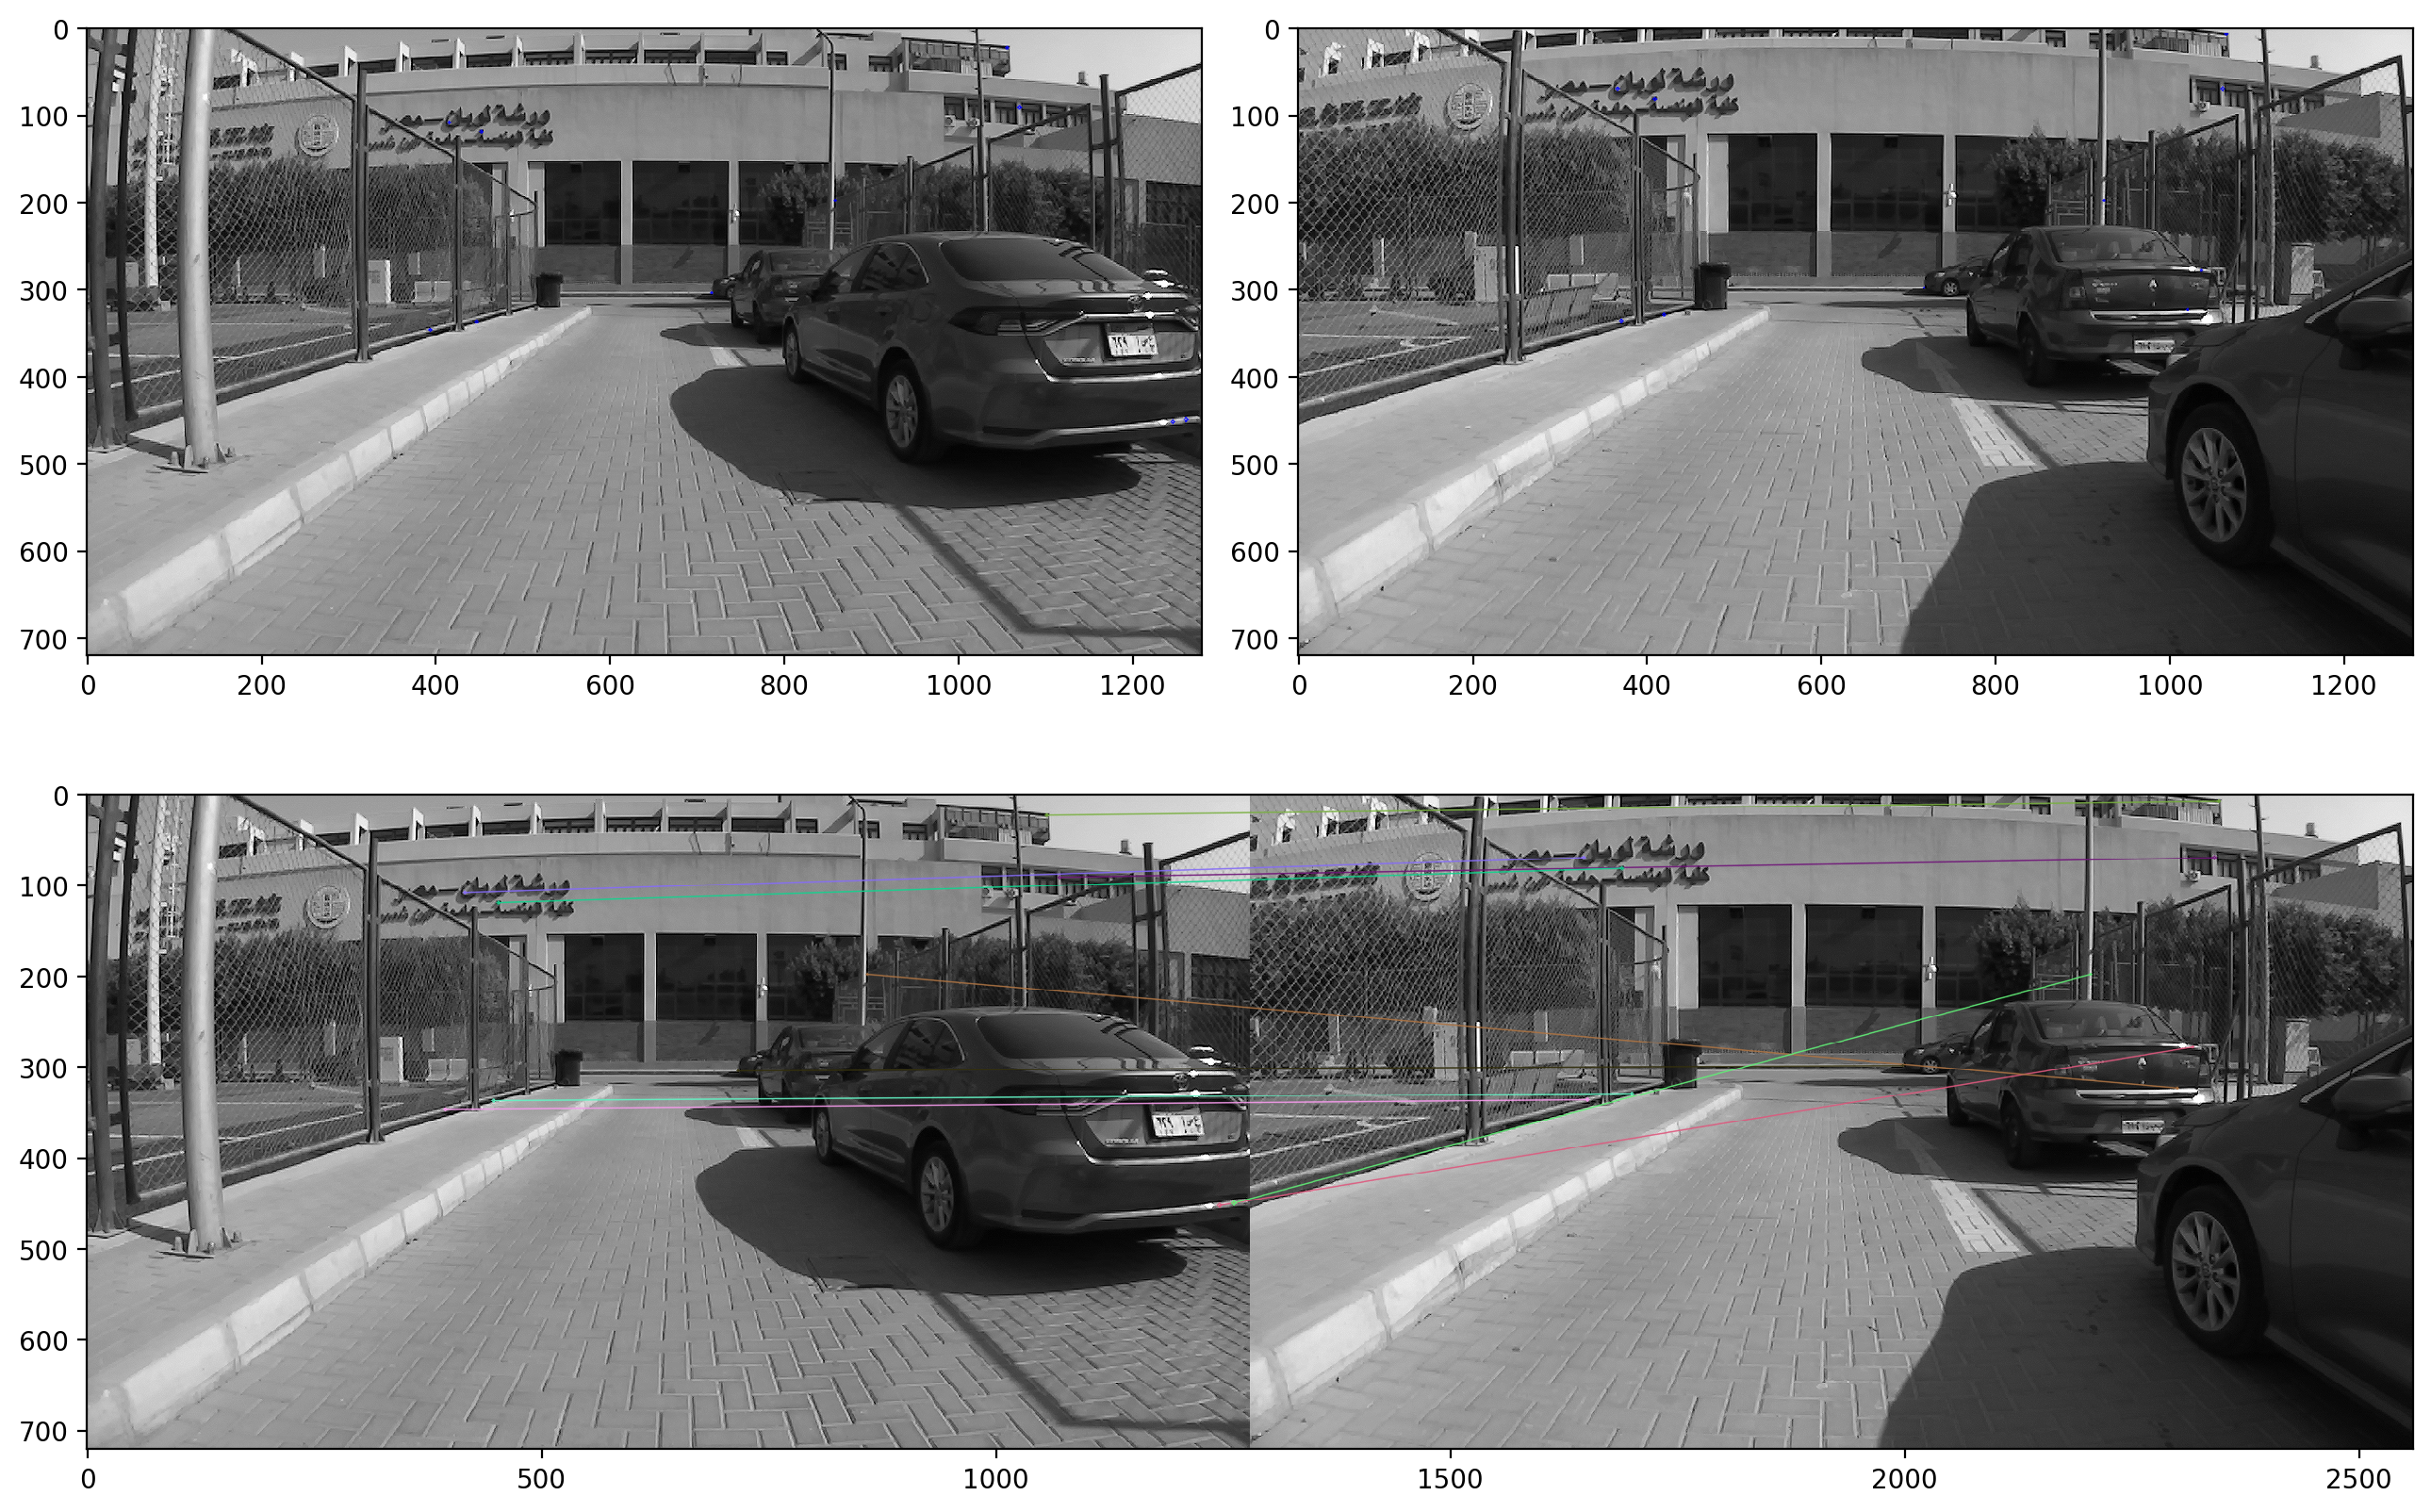

In [16]:
img1_path = '/home/loay/Desktop/arl_images/001771.png'
img2_path = '/home/loay/Desktop/arl_images/001791.png'

imgArr1 = np.array(Image.open(img1_path))
imgArr2 = np.array(Image.open(img2_path))
grayArr1 = cv2.cvtColor(imgArr1, cv2.COLOR_RGB2GRAY)
grayArr2 = cv2.cvtColor(imgArr2, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.15, edgeThreshold=15, nOctaveLayers=5)
bfMatcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # double match and doubls runtime

t1 = time.perf_counter()
kpts1, desc1 = sift.detectAndCompute(grayArr1, None)
kpts2, desc2 = sift.detectAndCompute(grayArr2, None)

matches = bfMatcher.match(desc1, desc2)
sortedMatches = sorted(matches, key=lambda x: x.distance)   # (1 to 1) min L2 is better
t2 = time.perf_counter()
print(f"BFMatcher runtime: {(t2 -t1)*1000:0.2f} (ms)")

bestKpts1 = []
bestKpts2 = []
for match in sortedMatches[:10]:
    # extracts matched ids from match object
    bestKpts1.append(kpts1[match.queryIdx])
    bestKpts2.append(kpts2[match.trainIdx])

# visualize best 10 matched keypoint
flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS + cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
outImg1 = cv2.drawKeypoints(grayArr1, bestKpts1, None, flags=flags, color=(0, 0, 255))
outImg2 = cv2.drawKeypoints(grayArr2, bestKpts2, None, flags=flags, color=(0, 0, 255))
matchImg = cv2.drawMatches(grayArr1, kpts1, grayArr2, kpts2, sortedMatches[:10], outImg=None, flags=flags)

fig = plt.figure(figsize=(13, 9), dpi=200, tight_layout=True)
gridSpec = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gridSpec[0, 0])
ax.imshow(outImg1)
# ---------------------
ax = fig.add_subplot(gridSpec[0, 1])
ax.imshow(outImg2)
# ---------------------
ax = fig.add_subplot(gridSpec[1, :])
ax.imshow(matchImg)

plt.tight_layout()

BFMatcher runtime: 61.28 (ms)


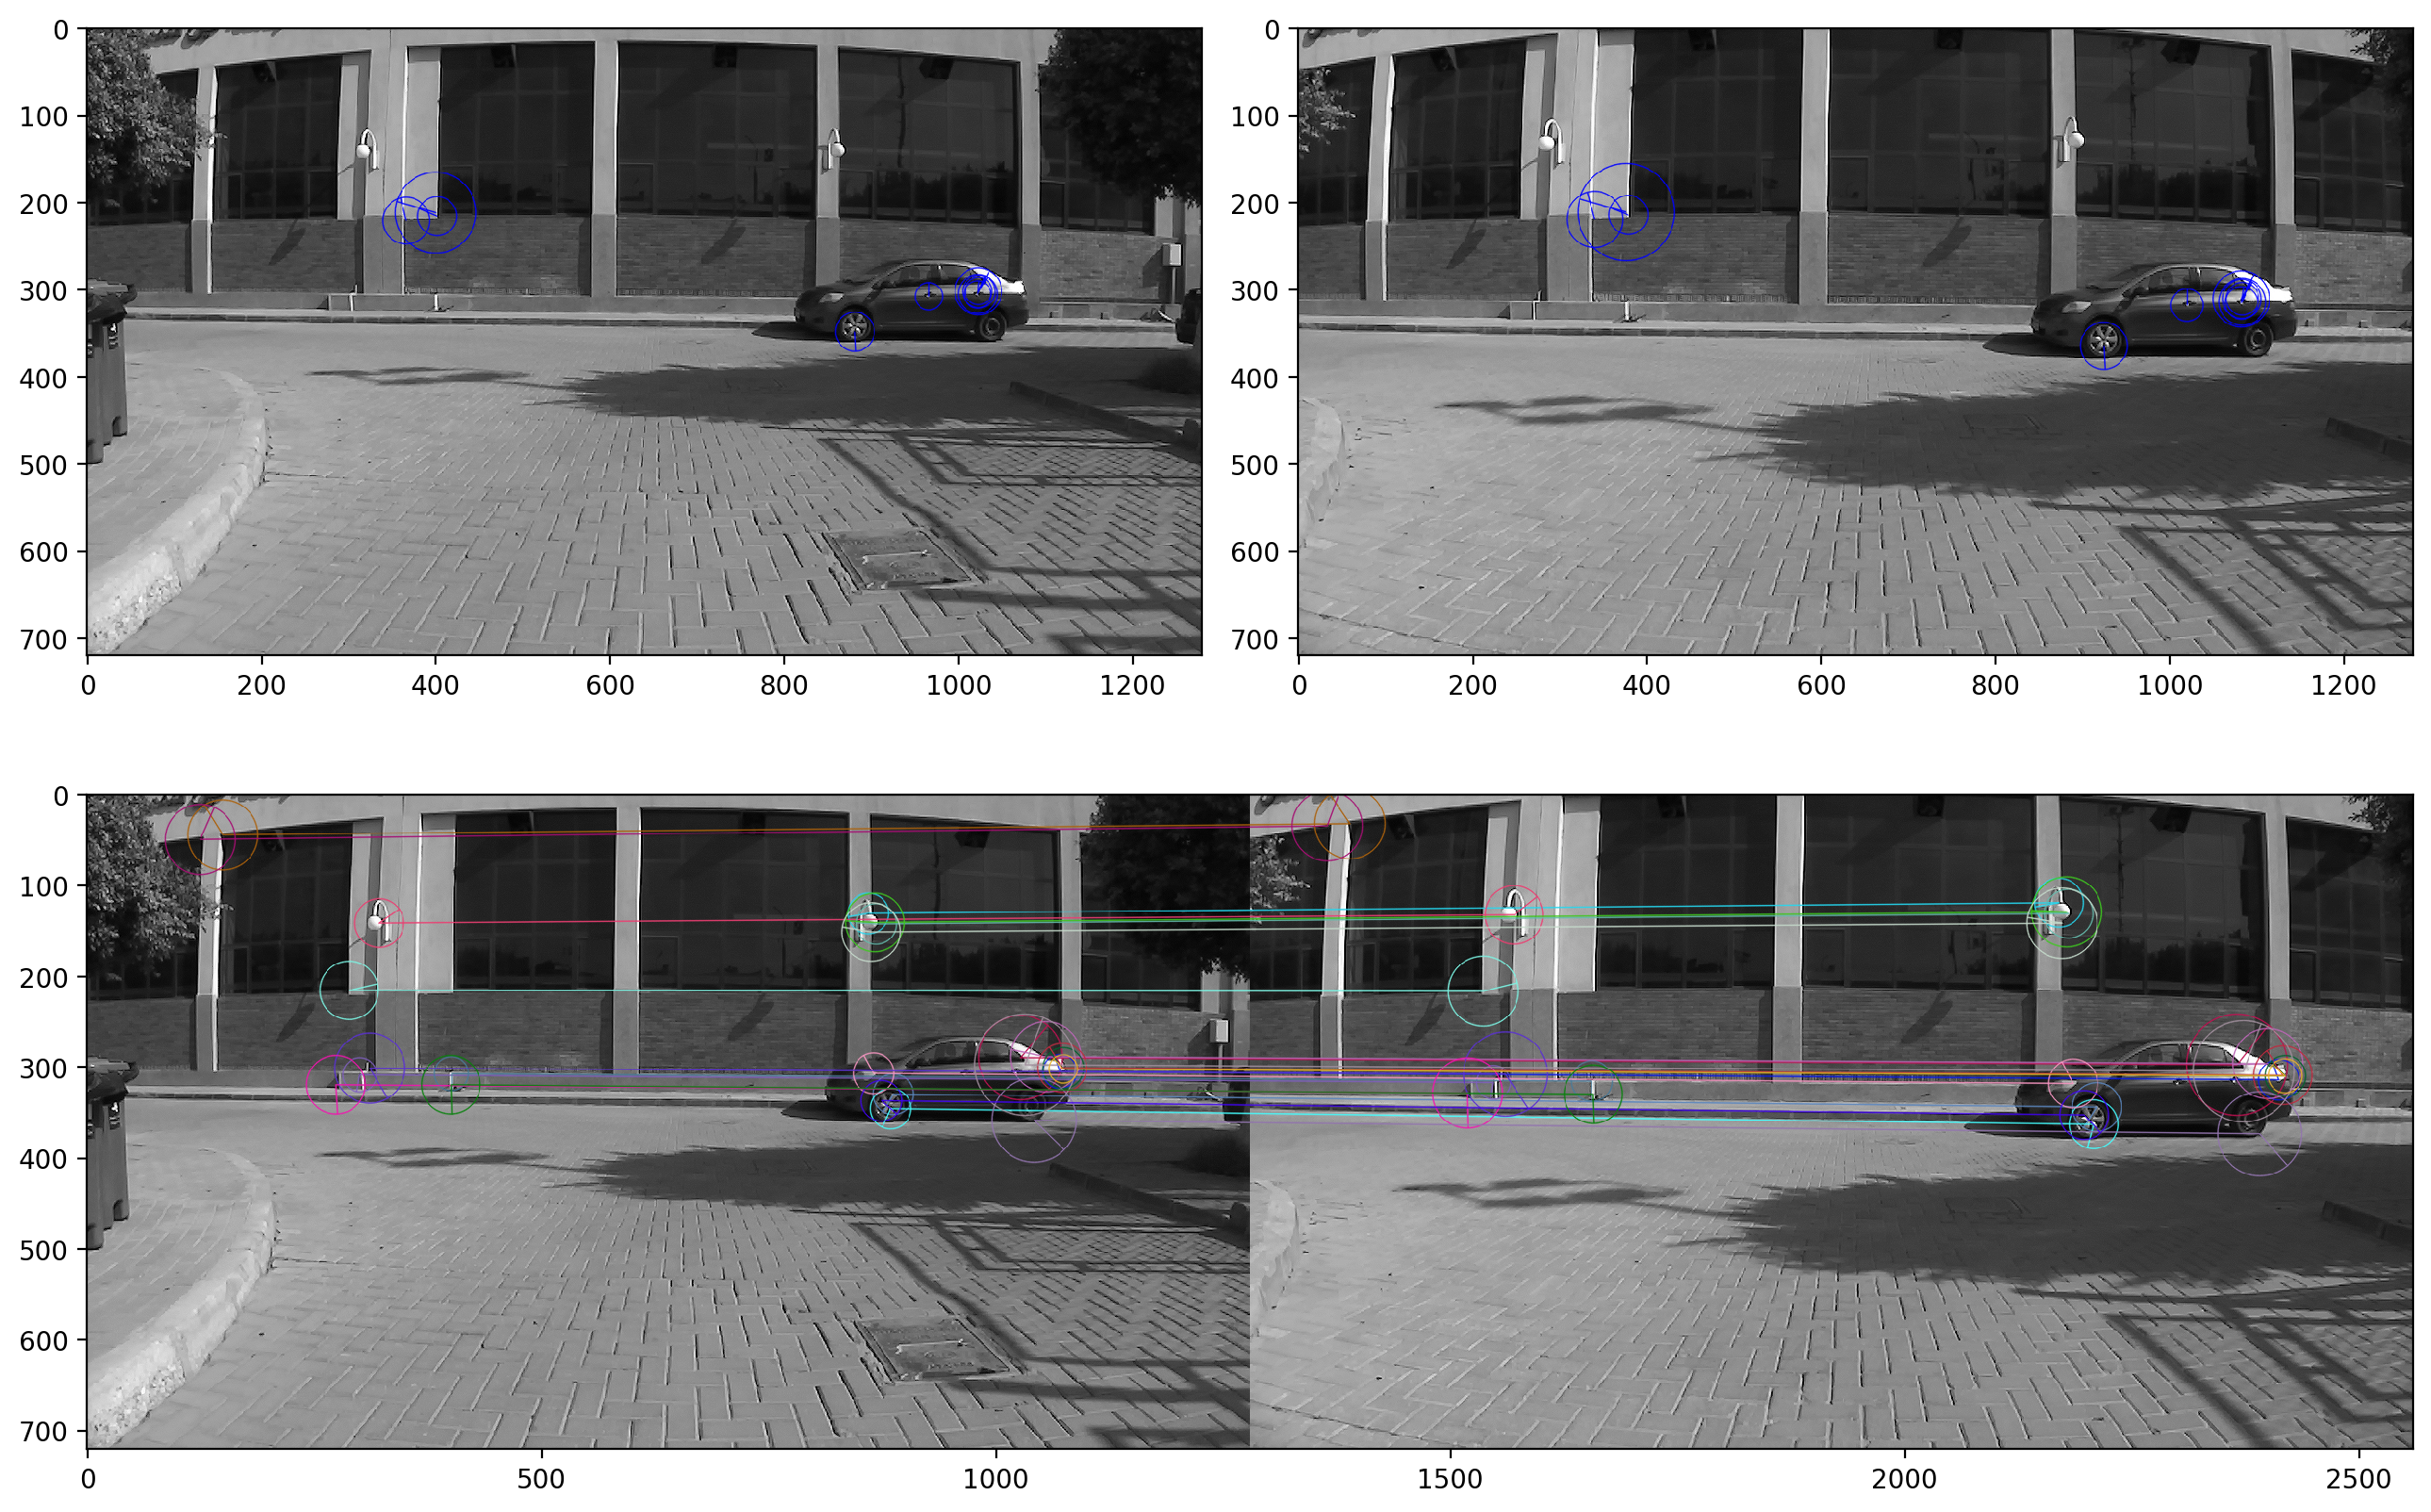

In [33]:
img1_path = '/home/loay/Desktop/arl_images/001851.png'
img2_path = '/home/loay/Desktop/arl_images/001861.png'

imgArr1 = np.array(Image.open(img1_path))
imgArr2 = np.array(Image.open(img2_path))
grayArr1 = cv2.cvtColor(imgArr1, cv2.COLOR_RGB2GRAY)
grayArr2 = cv2.cvtColor(imgArr2, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create(nfeatures=500, scoreType=cv2.ORB_HARRIS_SCORE, edgeThreshold=13)
# bfMatcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # double match and doubls runtime
bfMatcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # double match and doubls runtime

t1 = time.perf_counter()
kpts1, desc1 = orb.detectAndCompute(grayArr1, None)
kpts2, desc2 = orb.detectAndCompute(grayArr2, None)

matches = bfMatcher.match(desc1, desc2)
sortedMatches = sorted(matches, key=lambda x: x.distance)   # (1 to 1) min L2 is better
t2 = time.perf_counter()
print(f"BFMatcher runtime: {(t2 -t1)*1000:0.2f} (ms)")

bestKpts1 = []
bestKpts2 = []
for match in sortedMatches[:10]:
    # extracts matched ids from match object
    bestKpts1.append(kpts1[match.queryIdx])
    bestKpts2.append(kpts2[match.trainIdx])

# visualize best 10 matched keypoint
flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS + cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
outImg1 = cv2.drawKeypoints(grayArr1, bestKpts1, None, flags=flags, color=(0, 0, 255))
outImg2 = cv2.drawKeypoints(grayArr2, bestKpts2, None, flags=flags, color=(0, 0, 255))
matchImg = cv2.drawMatches(grayArr1, kpts1, grayArr2, kpts2, sortedMatches[75:100], outImg=None, flags=flags)

fig = plt.figure(figsize=(13, 9), dpi=200, tight_layout=True)
gridSpec = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gridSpec[0, 0])
ax.imshow(outImg1)
# ---------------------
ax = fig.add_subplot(gridSpec[0, 1])
ax.imshow(outImg2)
# ---------------------
ax = fig.add_subplot(gridSpec[1, :])
ax.imshow(matchImg)

plt.tight_layout()